In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("JEOPARDY_CSV.csv")

In [3]:
df.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [5]:
df.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

# 1a
### How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

In [6]:
df.shape[0]

216930

There are 216930 rows in the dataframe. Each row represent a jeopardy question.

Each row has a question with its respective category, value, price, and answer in its respective show number and air date.

# 1b
### Clean the data. How do you need to “clean” it? What is “dirty” about this data?
- There are white space in the begining of the columns names that needs to removed
- The 'Air Date' column data type is an object which needs to be converted into datetime
- The price column has dollar signs,commas,spaces and none values which needs to be removed for numerical computation

In [7]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [8]:
df['Air Date'] = pd.to_datetime(df['Air Date'])
df.dtypes

Show Number             int64
Air Date       datetime64[ns]
Round                  object
Category               object
Value                  object
Question               object
Answer                 object
dtype: object

In [9]:
df['Value'].unique()

array(['$200 ', '$400 ', '$600 ', '$800 ', '$2,000 ', '$1,000 ',
       '$1,200 ', '$1,600 ', '$3,200 ', 'None', '$5,000 ', '$100 ',
       '$300 ', '$500 ', '$1,500 ', '$4,800 ', '$1,800 ', '$1,100 ',
       '$2,200 ', '$3,400 ', '$3,000 ', '$4,000 ', '$6,800 ', '$1,900 ',
       '$3,100 ', '$700 ', '$1,400 ', '$2,800 ', '$8,000 ', '$6,000 ',
       '$2,400 ', '$12,000 ', '$3,800 ', '$2,500 ', '$6,200 ', '$10,000 ',
       '$7,000 ', '$1,492 ', '$7,400 ', '$1,300 ', '$7,200 ', '$2,600 ',
       '$3,300 ', '$5,400 ', '$4,500 ', '$2,100 ', '$900 ', '$3,600 ',
       '$2,127 ', '$367 ', '$4,400 ', '$3,500 ', '$2,900 ', '$3,900 ',
       '$4,100 ', '$4,600 ', '$10,800 ', '$2,300 ', '$5,600 ', '$1,111 ',
       '$8,200 ', '$5,800 ', '$750 ', '$7,500 ', '$1,700 ', '$9,000 ',
       '$6,100 ', '$1,020 ', '$4,700 ', '$2,021 ', '$5,200 ', '$3,389 ',
       '$4,200 ', '$5 ', '$2,001 ', '$1,263 ', '$4,637 ', '$3,201 ',
       '$6,600 ', '$3,700 ', '$2,990 ', '$5,500 ', '$14,000 ', '$2,700 ',
   

In [10]:
df['Value']=df['Value'].str.replace('$','')
df['Value']=df['Value'].str.replace(',','')
df['Value']=df['Value'].str.replace(' ','')
df['Value']=df['Value'].str.replace('None','0')
df['Value'] =  pd.to_numeric(df['Value'])

In [11]:
df['Value'].dtype

dtype('int64')

# 1c
### How many unique shows were there each year?

In [12]:
group_year=df.groupby(df['Air Date'].dt.year)
shows=group_year['Show Number'].nunique()
unique_shows=pd.DataFrame(shows)
unique_shows

,Show Number
Air Date,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


# 1d
### How many unique shows were there each year?

In [13]:
categories=pd.DataFrame(df["Category"].value_counts())
categories.sort_values("Category",ascending=False)

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
MUSICAL INNOVATORS,1
CONTINENTS,1
STREISAND FILMS,1
INSPIRATIONS FOR MUSICALS,1


# 1e
### Which month (over the years) has had the most shows?

In [14]:
year_month = df.groupby([df['Air Date'].dt.year,df['Air Date'].dt.month])
shows = year_month["Show Number"].nunique()
most_shows=pd.DataFrame(shows)
most_shows.sort_values("Show Number",ascending=False).head(15)

,,Show Number
Air Date,Air Date,
1997,12,23
2007,1,23
2009,12,23
2005,3,23
2004,12,23
2010,3,23
2003,1,23
1998,12,23
1999,3,23


In [15]:
group_month=df.groupby(df['Air Date'].dt.month)
shows=group_month['Show Number'].nunique()
most_shows=pd.DataFrame(shows)
most_shows.sort_values("Show Number",ascending=False)

,Show Number
Air Date,
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293


# 1f
### Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

In [16]:
answer=pd.DataFrame(df["Answer"].value_counts())
answer.sort_values("Answer",ascending=False).head(3)

,Answer
China,216
Australia,215
Japan,196


In [17]:
df[df['Answer'].isin(answer.index[:3])]

,Show Number,Air Date,Round,Category,Value,Question,Answer
404,2825,1996-12-06,Double Jeopardy!,HISTORY,600,In February 1904 this country attacked the Rus...,Japan
560,3036,1997-11-10,Jeopardy!,AT THE KENNEDY CENTER,500,A 1994 festival honoring this country featured...,Australia
598,4107,2002-06-11,Jeopardy!,REMEMBER THE TIME,200,In 1958 this country launched its second 5-yea...,China
688,2735,1996-06-21,Double Jeopardy!,WORLD GEOGRAPHY,200,Large aboriginal populations live in this coun...,Australia
874,4541,2004-05-10,Double Jeopardy!,GROSS NATIONAL PRODUCTS,1200,Sanma aisu is fish-flavored ice cream & taco a...,Japan
...,...,...,...,...,...,...,...
215568,3589,2000-03-23,Jeopardy!,BEER COUNTRY OF ORIGIN,400,Kirin,Japan
215912,6003,2010-10-20,Final Jeopardy!,COUNTRY DEMOGRAPHICS,0,"Because of a policy adopted in 1979, this coun...",China
216044,4364,2003-07-17,Jeopardy!,"MONEY, MONEY, MONEY",600,Norfolk Island & the Republic of Kiribati use ...,Australia
216150,1983,1993-03-31,Jeopardy!,FASHION,100,Colorful patches called p'u-fang used to indic...,China


# 2 
### Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

<ipython-input-18-d47300110825>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_five_categories.index, rotation=90)


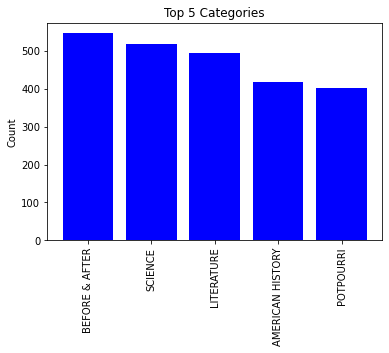

In [18]:
top_five_categories= categories.sort_values("Category",ascending=False).head(5)
fig,ax = plt.subplots()
ax.bar(top_five_categories.index, top_five_categories["Category"]
           ,color = "blue")
ax.set_xticklabels(top_five_categories.index, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Top 5 Categories")
plt.show()